## End to end charn prediction for bank customer

### 1. Problem
 > predicting whether the customer is using the account on the bank or he/she closed the account using previuse customer data from a bank
 
### 2. Data
> The data we going to use is from kaggle https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

### 3. Features
 
 > * Row Number: Just an index number
 > * CustomerId : 
 > * Surname: Name of the client
 > * CreditScore:
 > * Geography: Location of the client 3 values
     * Spain
     * France
     * Germany
 > * Gender:
 > * Age:
 > * Tenure :
 > * Balance:
 > * NumOfProduct: such as loan,creaditcard,...
 > * HasCrCard: 1-if credit card is given or 0 
 > * isActiveMember: 1 - if its active or 0 
 > * EstimatedSalary:
 > * Exited:
 
 ### Evaluation 
 > The best result from classification models
 
 
 
 

In [1]:
#first lets import libraries for EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import the data
customers = pd.read_csv('datas/Churn_Modelling.csv')

customers.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
# lets see what each column
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### We have 13 columns three of them are objects to we have to change to numeric format 

Lets see if there is null values


In [4]:
customers.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**luckily we don't have null row on our data**

After seeing the data we dont really need RowNumber, CustomerId,Name 

In [5]:
customers.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

customers.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

<AxesSubplot: xlabel='Exited'>

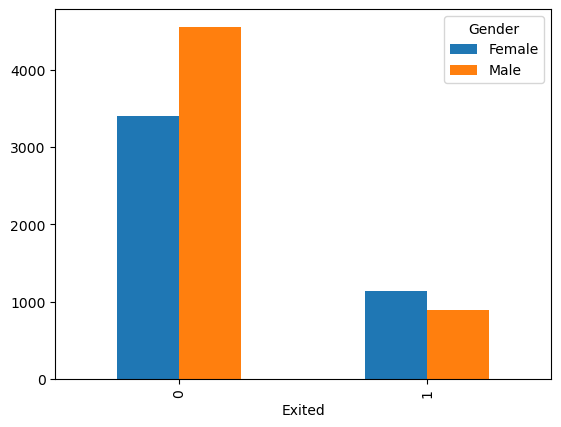

In [6]:
#ploting Gender to Exited column to see the ratio of male and female who still using the bank and exited
pd.crosstab(customers.Exited,customers.Gender).plot(kind='bar')

<AxesSubplot: xlabel='Exited'>

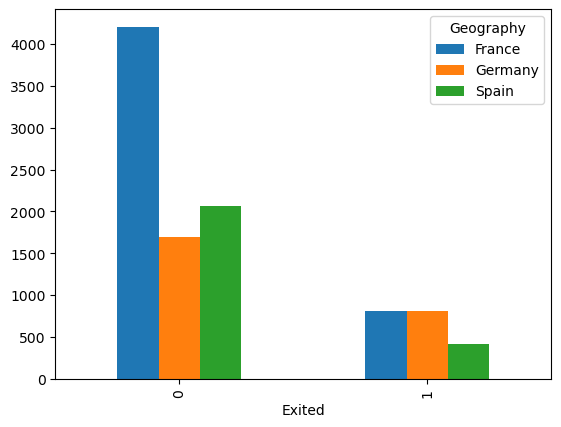

In [7]:
# The same as the previouse cell but this time I used Geography
pd.crosstab(customers.Exited,customers.Geography).plot(kind='bar')

In [8]:
customers = pd.get_dummies(customers,drop_first=False)

customers.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [9]:
customers.shape

(10000, 14)

<AxesSubplot: >

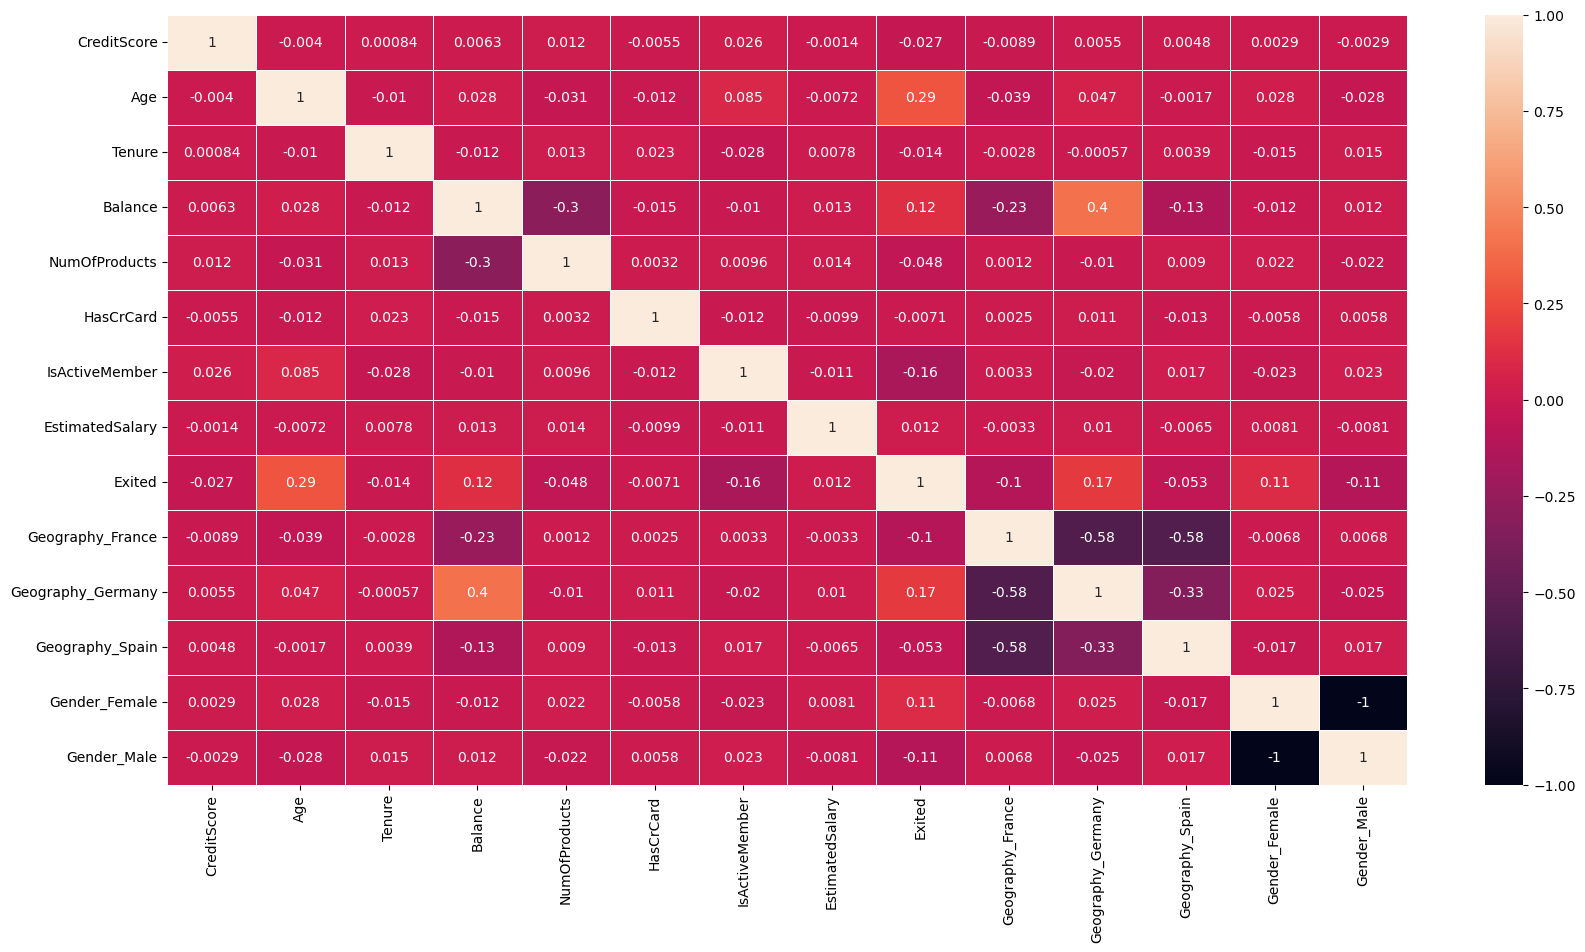

In [10]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(customers.corr(), annot=True, linewidths=.5, ax=ax)

### lets import machin learning tools

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,accuracy_score,classification_report,recall_score,roc_curve

In [12]:
X = customers.drop('Exited',axis=1)
y = customers.Exited

In [13]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

logistic_base_model = LogisticRegression()

random_base_model = RandomForestClassifier()

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9000, 13), (1000, 13), (9000,), (1000,))

In [14]:
logistic_base_model.fit(X_train,y_train)
random_base_model.fit(X_train,y_train)

logistic_base_model.score(X_test,y_test),random_base_model.score(X_test,y_test)

(0.806, 0.869)

#### Tuninig hyperparameter for logistic regression


In [15]:
logistic_grid = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear']
}

np.random.seed(42)

logistic_tune_model = GridSearchCV(LogisticRegression(n_jobs=-1),logistic_grid,cv=5,verbose=2)

logistic_tune_model.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.004832930238571752, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.012742749857031334, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ..C=0.615848211066026, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ..C=0.615848211066026, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=1.623776739188721, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.623776739188721, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=4.281332398719396, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=11.288378916846883, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=78.47599703514607, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.9138081114

C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ...C=206.913808111479, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ..C=545.5594781168514, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=545.5594781168514, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ..C=3792.690190732246, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3792.690190732246, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Deskto

[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=10000.0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=2)

In [16]:
logistic_tune_model.best_params_

{'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}

In [17]:
# sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_pred):
    """
    Showing confusion matrix with a better look
    """
    fig, ax = plt.subplots(figsize=(7,7))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred),fmt='.4g',annot=True,cbar=True,)
    plt.xlabel("Truth value")
    plt.ylabel('Predicted value')

In [18]:
y_pred = logistic_tune_model.predict(X_test)
y_pred
confusion_matrix(y_test,y_pred)

array([[781,  28],
       [152,  39]], dtype=int64)

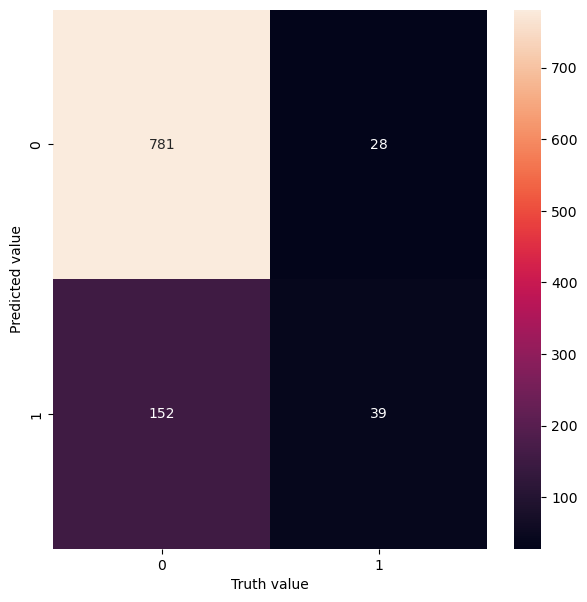

In [19]:
plot_confusion_matrix(y_test,y_pred)

In [20]:
%%time

random_grid = {
    'n_estimators':np.arange(10,200,20),
    'max_depth': [None,2,6,8],
    'min_samples_split':[2,6,8,12,16],
    'min_samples_leaf':[1,5,7,9,13,17],
    'max_features': ['auto','sqrt']
}

np.random.seed(42)

random_tune_model = GridSearchCV(RandomForestClassifier(n_jobs=-1),random_grid,cv=5,verbose=2)

random_tune_model.fit(X_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   1.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   1.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   2.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   1.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   1.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_fea

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.8s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, max

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.7s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.4s
[CV] END max_dept

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.3s
[CV] END max_depth=None, max_fea

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END max_depth=None, max_fea

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.6s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.4s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   1.0s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.4s
[CV] END max_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END

C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.5s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.4s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_l

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.4s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.4s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.4s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_sa

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt,

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_lea

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_lea

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.4s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt,

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_featur

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_sam

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt,

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt,

[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt,

C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.8s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.4s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.2s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_l

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   1.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.8s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.9s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.9s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   1.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.9s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   1.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.8s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt,

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_lea

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.8s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.8s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, mi

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_lea

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt,

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, m

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=6, max_featur

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_sam

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.4s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, mi

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.8s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.7s
[CV] END max_depth=6, max_features=sqrt,

[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=sqrt,

C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=190; total time=   0.8s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=130; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=12, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=2, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=6, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=170; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=8, n_estimators=190; total time=   1.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=9, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   1.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   1.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=6, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=8, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=30; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=30; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=130; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   1.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   1.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=150; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   1.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=170; total time=   1.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   1.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=6, n_estimators=190; total time=   1.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=110; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=130; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   1.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   1.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=8, n_estimators=190; total time=   0.8s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=70; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   1.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=12, n_estimators=190; total time=   0.8s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep t

[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.2s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=70; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=90; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=110; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.6s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=130; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.5s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.4s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=150; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.8s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=170; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.7s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   1.3s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.9s


C:\Users\ABDU\Desktop\project\data-science\churn-prediction\env\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=17, min_samples_split=16, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=90; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_l

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=150; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=170; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=16, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.7s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_l

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_sa

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt,

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_lea

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=12, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, mi

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_lea

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=130; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.7s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=170; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=90; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=9, min_samples_split=16, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, 

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=2, n_estimators=190; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, 

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=70; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_sam

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=130; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=12, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_featur

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=13, min_samples_split=16, n_estimators=190; total time=   0.6s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_s

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.3s
[CV] END max_depth=8, max_features=sqrt, min_sa

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=150; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.5s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=8, n_estimators=170; total time=   0.4s
[CV] END max_depth=8, max_features=sqrt,

[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=30; total time=   0.0s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=sqrt,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 5, 7, 9, 13, 17],
                         'min_samples_split': [2, 6, 8, 12, 16],
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
             verbose=2)

In [21]:
random_tune_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 110}

In [22]:
y_pred = random_tune_model.predict(X_test)

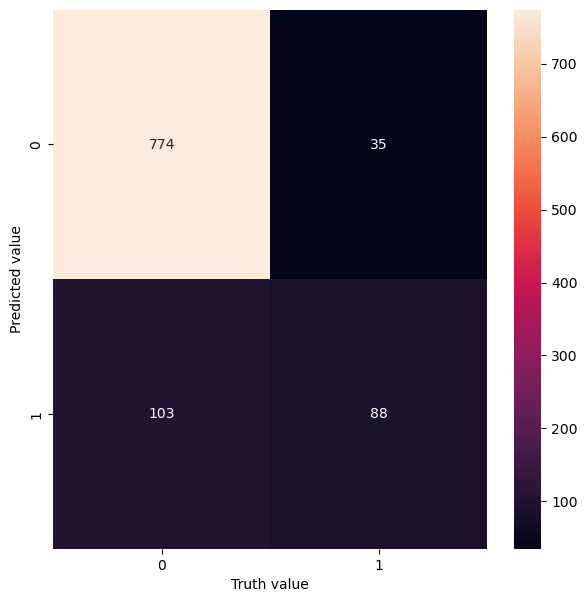

In [23]:
plot_confusion_matrix(y_test,y_pred)

In [26]:
accuracy_score(y_test,y_pred)

0.862